# Hello, PyTorch! -- MNIST Handwritten Digits

- https://en.wikipedia.org/wiki/MNIST_database

## Exercise 1 questions: 

1A) 
What is the accuracy using 60,000 images? 
Training the model with 60,000 images, the accuracy reached 96%. Each iteratin of training led to an accuracy level of 91%, 94%, 95%, 96%, and 96%.


What is the accuracy using 30,000 images? 
Training the model with 6,000 images, the accuracy reached 97%. Each iteratin of training led to an accuracy level of 91%, 94%, 95%, 96%, and 97%. 


What is the accuracy using 6,000 images? 
Training the model with 6,000 images, the accuracy reached 91%. Each iteratin of training led to an accuracy level of 62%, 82%, 87%, 90%, and 91%. 


What is the accuracy using 3,000 images? 
Training the model with 3,000 images, the accuracy reached 82%. Each iteratin of training led to an accuracy level of 32%, 50%, 63%, 78%, and 82%. 


What is the accuracy using 600 images? 
Training the model with 600 images, the accuracy reached 41%. Each iteratin of training led to an accuracy level of 12%, 18%, 25%, 33%, and 41%. 




1B) How do the weights look different when trained with 60,000 vs 600? 
Training with 60,000 images seems to produce stronger clustering whereas training with 600 seems to lead to more random results with scattered points. 

# Load Datasets

In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
x = datasets.MNIST('data', download = True)
x[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [5]:
# Added by Fred 
x[0][0]

In [6]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [7]:
dataset1 = datasets.MNIST('data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=64)

dataset2 = datasets.MNIST('data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=1000)

In [8]:
i, x = next(enumerate(train_loader))
x[0].shape

# 4 dimensional array: 64 = numer of images, 28 x 28 = pixels dimensions, 1 = channel

torch.Size([64, 1, 28, 28])

# View Image

In [9]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

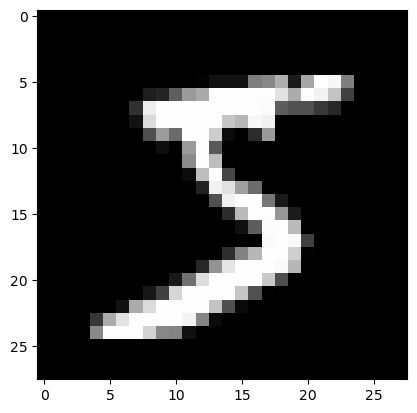

In [10]:
i, x = next(enumerate(train_loader))
x2 = np.squeeze(x[0][0])
plt.imshow(x2, cmap='gray')

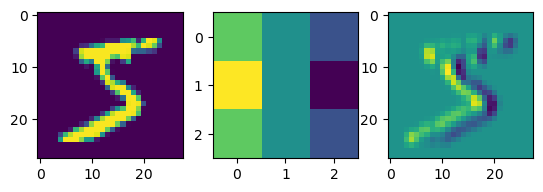

In [11]:
kernel = np.array([[1, 0, -1], 
                   [2, 0, -2], 
                   [1, 0, -1]])
# converting the image array
y = scipy.ndimage.convolve(x2, kernel)

fig, axes = plt.subplots(1,3)
axes[0].imshow(x2)
axes[1].imshow(kernel)
axes[2].imshow(y)


# not grey scale original image 
# middle is kernel 
# mixing in by 3x3 to convolve 

# Create Network

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [14]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
summary(network, input_size=(1,28,28))

# instantiate our network 

/opt/anaconda3/envs/pytorch/lib/python3.13/site-packages/torch/nn/functional.py:1545: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Conv2d: 1-1                            [10, 24, 24]              260
├─Conv2d: 1-2                            [20, 8, 8]                5,020
├─Dropout2d: 1-3                         [20, 8, 8]                --
├─Linear: 1-4                            [1, 50]                   16,050
├─Linear: 1-5                            [1, 10]                   510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.88
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.09
Estimated Total Size (MB): 0.15

# Visualize Weights

In [15]:
def visualize():
    i, x = next(enumerate(test_loader))
    x2 = np.squeeze(x[0][0])
    weights = network.conv1.weight.data
    
    fig, axes = plt.subplots(10,2)
    for i in range(10):
        weights_np = np.squeeze(weights.numpy()[i,0,:,:])
        axes[i,0].imshow(weights_np)
        axes[i,1].imshow(scipy.ndimage.convolve(x2, weights_np))

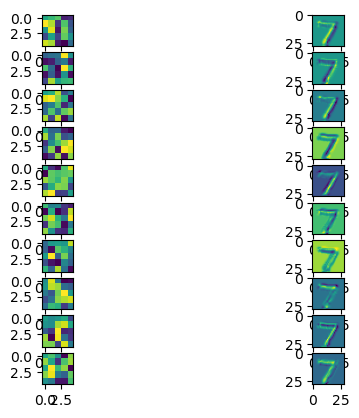

In [16]:
visualize()

# for the first image training -> work on separate

# Predict Using Network

In [17]:
i, x = next(enumerate(train_loader))
x[1][:5]

tensor([5, 0, 4, 1, 9])

In [18]:
y = network(x[0])
pred = y.data.max(1)[1]
pred[:5]

# tensor = fancy array 
# this specifically is a one dimensional array 

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


tensor([7, 2, 7, 1, 7])

# First Test and Train

In [19]:
def test():
  network.eval()
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  print('Test accuracy: {:.0f}%\n'.format(100. * correct / len(test_loader.dataset)))

# run through all 10,000 and then check accuracy 

In [20]:
test() 

# randomly getting it correct 

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Test accuracy: 13%



In [22]:
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
def train():
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 == 0:
      print('Train loss: {:.6f}'.format(loss.item()))

In [23]:
train()

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train loss: 2.300189
Train loss: 1.836784
Train loss: 1.057307
Train loss: 0.789937
Train loss: 0.645238
Train loss: 0.604386
Train loss: 0.391260
Train loss: 0.619732
Train loss: 0.688990
Train loss: 0.550643


# Train Network

In [24]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
for epoch in range(5):
    train()
    test()

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train loss: 2.380569
Train loss: 1.998040
Train loss: 1.088722
Train loss: 0.880179
Train loss: 0.587168
Train loss: 0.620628
Train loss: 0.466228
Train loss: 0.757042
Train loss: 0.605753
Train loss: 0.458176
Test accuracy: 94%

Train loss: 0.497668
Train loss: 0.323391
Train loss: 0.522250
Train loss: 0.593115
Train loss: 0.382733
Train loss: 0.405860
Train loss: 0.366821
Train loss: 0.362570
Train loss: 0.561634
Train loss: 0.358438
Test accuracy: 96%

Train loss: 0.197752
Train loss: 0.291997
Train loss: 0.287373
Train loss: 0.419613
Train loss: 0.312481
Train loss: 0.265584
Train loss: 0.227718
Train loss: 0.394975
Train loss: 0.510603
Train loss: 0.305521
Test accuracy: 97%

Train loss: 0.348894
Train loss: 0.181146
Train loss: 0.341901
Train loss: 0.234538
Train loss: 0.190368
Train loss: 0.228033
Train loss: 0.181972
Train loss: 0.406311
Train loss: 0.393729
Train loss: 0.361835
Test accuracy: 97%

Train loss: 0.190244
Train loss: 0.202098
Train loss: 0.177031
Train loss: 0.263

# Inspect Network

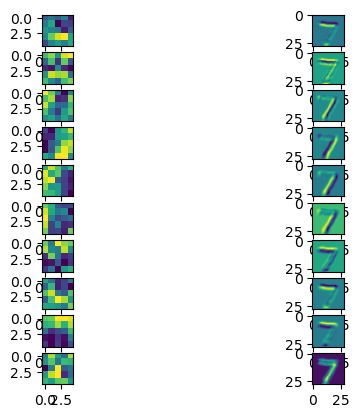

In [25]:
visualize()

# visualizing the filters 

In [26]:
i, x = next(enumerate(train_loader))
x[1][:5]

tensor([5, 0, 4, 1, 9])

In [27]:
y = network(x[0])
pred = y.data.max(1)[1]
pred[:5]

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


tensor([5, 0, 4, 1, 9])

# How Much Data?

- What is the accuracy using 60,000 images? 30,000? 6,000? 3,000? 600?
- How do the weights looks different when trained with 60,000 vs 600?

In [ ]:
# NOTES: 
# purpose of this exercise is to take an image and determine what hand written digit it is 
# new digit gives probability 
# reason = recognition 

# make the model and have zero for everything -> intialize it with a random state - normally distributed and place it 0 and 1 (filters is tryingt orecognize some characteristic - edge or spot detector)
# these are the lowest level features and then using higher -. narrow its ability what digits are likely (different digits light upd ifferent features 
    # combindation of features are being lit up
    # weights of level of features -> which combination of features were lit up 

### 60,000 images

Accuracy reaches 96% 

In [28]:
dataset1 = datasets.MNIST('data', train=True, download=True, transform=transform)
dataset1 = torch.utils.data.Subset(dataset1, range(30000))
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=64)

In [29]:
# Create a new network and optimizer each time you try a new training set
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
for epoch in range(5):
    train()
    test()

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train loss: 2.284203
Train loss: 1.908651
Train loss: 1.106299
Train loss: 0.867212
Train loss: 0.840451
Test accuracy: 91%

Train loss: 0.726596
Train loss: 0.469418
Train loss: 0.630818
Train loss: 0.792718
Train loss: 0.540603
Test accuracy: 94%

Train loss: 0.372162
Train loss: 0.301457
Train loss: 0.204423
Train loss: 0.485110
Train loss: 0.298496
Test accuracy: 95%

Train loss: 0.414826
Train loss: 0.313838
Train loss: 0.286366
Train loss: 0.502919
Train loss: 0.153435
Test accuracy: 96%

Train loss: 0.223409
Train loss: 0.272089
Train loss: 0.273801
Train loss: 0.387351
Train loss: 0.322846
Test accuracy: 96%



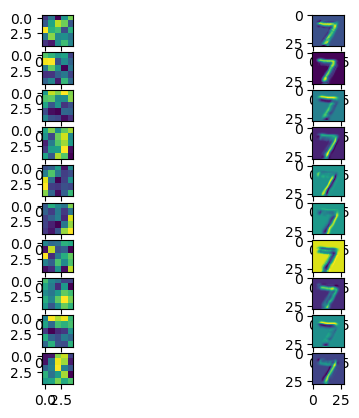

In [30]:
visualize()

### 30,000 images

Accuracy reaches 97% 

In [31]:
# Create dataset for 30,000 images 
dataset1 = datasets.MNIST('data', train=True, download=True, transform=transform)
dataset1 = torch.utils.data.Subset(dataset1, range(30000))
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=64)

# Create a new network and optimizer each time you try a new training set
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
for epoch in range(5):
    train()
    test()

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train loss: 2.299641
Train loss: 2.059569
Train loss: 1.080311
Train loss: 0.767210
Train loss: 0.511723
Test accuracy: 91%

Train loss: 0.627456
Train loss: 0.543332
Train loss: 0.418258
Train loss: 0.816628
Train loss: 0.345492
Test accuracy: 94%

Train loss: 0.429453
Train loss: 0.334872
Train loss: 0.332334
Train loss: 0.437868
Train loss: 0.471825
Test accuracy: 95%

Train loss: 0.324715
Train loss: 0.316307
Train loss: 0.309911
Train loss: 0.261771
Train loss: 0.150828
Test accuracy: 96%

Train loss: 0.302719
Train loss: 0.260966
Train loss: 0.254841
Train loss: 0.255269
Train loss: 0.416259
Test accuracy: 97%



### 6,000 images

Accuracy reaches 91% 

In [34]:
# Create dataset for 6,000 images 
dataset1 = datasets.MNIST('data', train=True, download=True, transform=transform)
dataset1 = torch.utils.data.Subset(dataset1, range(6000))
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=64)

# Create a new network and optimizer each time you try a new training set
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
for epoch in range(5):
    train()
    test()

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train loss: 2.358379
Test accuracy: 62%

Train loss: 1.857011
Test accuracy: 82%

Train loss: 1.009932
Test accuracy: 87%

Train loss: 0.864690
Test accuracy: 90%

Train loss: 0.564968
Test accuracy: 91%



### 3,000 images

Accuracy reaches 82%

In [35]:
# Create dataset for 3,000 images 
dataset1 = datasets.MNIST('data', train=True, download=True, transform=transform)
dataset1 = torch.utils.data.Subset(dataset1, range(3000))
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=64)

# Create a new network and optimizer each time you try a new training set
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
for epoch in range(5):
    train()
    test()

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train loss: 2.296287
Test accuracy: 32%

Train loss: 2.281032
Test accuracy: 50%

Train loss: 2.004940
Test accuracy: 63%

Train loss: 1.680558
Test accuracy: 78%

Train loss: 1.370431
Test accuracy: 82%



### 600 images 

Accuracy reaches 32% 

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_68918/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train loss: 2.423307
Test accuracy: 12%

Train loss: 2.331915
Test accuracy: 18%

Train loss: 2.282198
Test accuracy: 25%

Train loss: 2.289980
Test accuracy: 33%

Train loss: 2.226539
Test accuracy: 41%



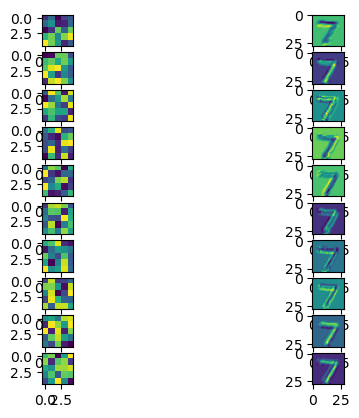

In [37]:
# Create dataset for 600 images 
dataset1 = datasets.MNIST('data', train=True, download=True, transform=transform)
dataset1 = torch.utils.data.Subset(dataset1, range(600))
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=64)

# Create a new network and optimizer each time you try a new training set
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
for epoch in range(5):
    train()
    test()
    
visualize()